# **Import Statements**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Loading and Cleaning Data**

## **Loading and Understanding Data**

In [3]:
data = pd.read_excel('car_price_prediction.xlsx')
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,2022-05-04 00:00:00,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,2022-05-04 00:00:00,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,2022-05-04 00:00:00,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,2022-05-04 00:00:00,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2022-03-02 00:00:00,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,2022-05-04 00:00:00,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Black,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [5]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
data = data[data['ID'].notna()]

In [7]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## **Cleaning Data**

### **Renaming Columns**

In [8]:
data.rename(columns = {'Prod. year':'Prod_year'}, inplace = True)
data.rename(columns = {'Engine volume':'Engine_vol'}, inplace = True)
data.rename(columns = {'Fuel type':'Fuel_type'}, inplace = True)
data.rename(columns = {'Gear box type':'Gear_type'}, inplace = True)
data.rename(columns = {'Leather interior':'Leather_interior'}, inplace = True)
data.rename(columns = {'Drive wheels':'Drive_wheels'}, inplace = True)

In [9]:
data

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_vol,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,2022-05-04 00:00:00,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,2022-05-04 00:00:00,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,2022-05-04 00:00:00,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,2022-05-04 00:00:00,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2022-03-02 00:00:00,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,2022-05-04 00:00:00,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Black,4


In [10]:
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod_year              54
Category               11
Leather_interior        2
Fuel_type               7
Engine_vol            107
Mileage              7687
Cylinders              13
Gear_type               4
Drive_wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [11]:
data

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_vol,Mileage,Cylinders,Gear_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,2022-05-04 00:00:00,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,2022-05-04 00:00:00,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,2022-05-04 00:00:00,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,2022-05-04 00:00:00,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2022-03-02 00:00:00,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,2022-05-04 00:00:00,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,2022-05-04 00:00:00,Left wheel,Black,4


In [12]:
data['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [13]:
numerical_cols_name = data.select_dtypes(include=['int', 'float']).drop(['Price'], axis=1)
object_cols_name = data.select_dtypes(include=['object'])
target_col = data.Price

In [14]:
object_cols_name

,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_vol,Mileage,Gear_type,Drive_wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,2022-05-04 00:00:00,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,2022-05-04 00:00:00,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,2022-05-04 00:00:00,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,2022-05-04 00:00:00,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,2022-05-04 00:00:00,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,2022-03-02 00:00:00,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,2022-05-04 00:00:00,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,2022-05-04 00:00:00,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,2022-05-04 00:00:00,Left wheel,Black


In [15]:
data.dtypes

ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod_year            int64
Category            object
Leather_interior    object
Fuel_type           object
Engine_vol          object
Mileage             object
Cylinders            int64
Gear_type           object
Drive_wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

In [16]:
numerical_cols_name = numerical_cols_name.drop('ID', axis=1)
numerical_cols_name

,Prod_year,Cylinders,Airbags
0,2010,6,12
1,2011,6,8
2,2006,4,2
3,2011,4,0
4,2014,4,4
...,...,...,...
19232,1999,4,5
19233,2011,4,8
19234,2010,4,4
19235,2007,4,4


In [17]:
object_cols_name.Mileage = object_cols_name.Mileage.str.replace('km', '')
object_cols_name.Mileage = object_cols_name.Mileage.astype('float')

In [18]:
object_cols_name['Mileage'][object_cols_name.Mileage<=0].value_counts()

0.0    721
Name: Mileage, dtype: int64

In [19]:
object_cols_name['Mileage'][object_cols_name.Mileage<=0] = object_cols_name.Mileage.mean()

In [20]:
object_cols_name['Mileage'][object_cols_name.Mileage<=0].value_counts()

Series([], Name: Mileage, dtype: int64)

In [21]:
object_cols_name.Levy = object_cols_name.Levy.replace('-', np.nan)
object_cols_name.Levy = object_cols_name.Levy.astype('float')
object_cols_name.isnull().sum()

Levy                5819
Manufacturer           0
Model                  0
Category               0
Leather_interior       0
Fuel_type              0
Engine_vol             0
Mileage                0
Gear_type              0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
dtype: int64

In [22]:
object_cols_name.Levy = object_cols_name.Levy.fillna(object_cols_name.Levy.mean())
object_cols_name.isnull().sum()

Levy                0
Manufacturer        0
Model               0
Category            0
Leather_interior    0
Fuel_type           0
Engine_vol          0
Mileage             0
Gear_type           0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
dtype: int64

In [23]:
object_cols_name['Engine_vol'].value_counts().keys()

Index([          2,         2.5,         1.8,         1.6,         1.5,
               3.5,         2.4,           3,         1.3, '2.0 Turbo',
       ...
       '0.3 Turbo', '5.4 Turbo', '0.4 Turbo', '0.2 Turbo', '5.7 Turbo',
               6.8,         6.7,         3.1, '0.8 Turbo', '1.1 Turbo'],
      dtype='object', length=107)

In [24]:
object_cols_name['Engine_vol'] = object_cols_name['Engine_vol'].astype(str)

In [25]:
object_cols_name['Engine_type'] = object_cols_name['Engine_vol'].apply(lambda x: 'Turbo' if 'Turbo' in x.split() else 'Non Turbo')
object_cols_name['Engine_vol'] = object_cols_name['Engine_vol'].str.replace('Turbo', '')
object_cols_name['Engine_vol'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 ', '2.2 ', '4.7', '1.5', '4.4', '3.0 ', '1.4 ', '3.6', '2.3',
       '1.5 ', '1.6 ', '2.2', '2.3 ', '1.4', '5.5', '2.8 ', '3.2', '3.8',
       '4.6', '1.2', '5', '1.7', '2.9', '0.5', '1.8 ', '2.4 ', '3.5 ',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 ', '1.1', '2.1',
       '0.7', '5.4', '1.3 ', '3.7', '1', '2.5 ', '2.6', '1.9 ', '4.4 ',
       '4.7 ', '0.8', '0.2 ', '5.7', '4.8 ', '4.6 ', '6.7', '6.2', '1.2 ',
       '3.4', '1.7 ', '6.3 ', '2.7 ', '4.3', '4.2', '2.9 ', '0', '4.0 ',
       '20', '3.6 ', '0.3', '3.7 ', '5.9', '5.5 ', '0.2', '2.1 ', '5.6',
       '6', '0.7 ', '0.6 ', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 ',
       '6.3', '4.5 ', '0.8 ', '4.2 ', '3.1', '5.0 ', '6.4', '3.9', '5.7 ',
       '0.9', '0.4 ', '5.4 ', '0.3 ', '5.2', '5.8', '1.1 '], dtype=object)

In [26]:
object_cols_name['Engine_vol'] = object_cols_name['Engine_vol'].astype(str)
object_cols_name['Engine_vol'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 ', '2.2 ', '4.7', '1.5', '4.4', '3.0 ', '1.4 ', '3.6', '2.3',
       '1.5 ', '1.6 ', '2.2', '2.3 ', '1.4', '5.5', '2.8 ', '3.2', '3.8',
       '4.6', '1.2', '5', '1.7', '2.9', '0.5', '1.8 ', '2.4 ', '3.5 ',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 ', '1.1', '2.1',
       '0.7', '5.4', '1.3 ', '3.7', '1', '2.5 ', '2.6', '1.9 ', '4.4 ',
       '4.7 ', '0.8', '0.2 ', '5.7', '4.8 ', '4.6 ', '6.7', '6.2', '1.2 ',
       '3.4', '1.7 ', '6.3 ', '2.7 ', '4.3', '4.2', '2.9 ', '0', '4.0 ',
       '20', '3.6 ', '0.3', '3.7 ', '5.9', '5.5 ', '0.2', '2.1 ', '5.6',
       '6', '0.7 ', '0.6 ', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 ',
       '6.3', '4.5 ', '0.8 ', '4.2 ', '3.1', '5.0 ', '6.4', '3.9', '5.7 ',
       '0.9', '0.4 ', '5.4 ', '0.3 ', '5.2', '5.8', '1.1 '], dtype=object)

In [27]:
object_cols_name.Doors.value_counts()

2022-05-04 00:00:00    18332
2022-03-02 00:00:00      777
>5                       128
Name: Doors, dtype: int64

In [28]:
object_cols_name.Doors = object_cols_name.Doors.map({4:'4-5', 2:'2-3', '>5':'>5'})
object_cols_name.Doors.value_counts()


>5    128
Name: Doors, dtype: int64

In [29]:
object_cols_name

,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_vol,Mileage,Gear_type,Drive_wheels,Doors,Wheel,Color,Engine_type
0,1399.000000,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005.0,Automatic,4x4,NaN,Left wheel,Silver,Non Turbo
1,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000.0,Tiptronic,4x4,NaN,Left wheel,Black,Non Turbo
2,906.838128,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,Variator,Front,NaN,Right-hand drive,Black,Non Turbo
3,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,Automatic,4x4,NaN,Left wheel,White,Non Turbo
4,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,Automatic,Front,NaN,Left wheel,Silver,Non Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,906.838128,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000.0,Manual,Rear,NaN,Left wheel,Silver,Turbo
19233,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,Tiptronic,Front,NaN,Left wheel,Red,Non Turbo
19234,836.000000,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365.0,Automatic,Front,NaN,Left wheel,Grey,Non Turbo
19235,1288.000000,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258.0,Automatic,Front,NaN,Left wheel,Black,Non Turbo


In [30]:
object_cols_name['Doors'] = object_cols_name['Doors'].astype('str')
object_cols_name['Doors'].unique()

array(['nan', '>5'], dtype=object)

In [31]:
object_cols_name = object_cols_name.astype('str')
object_cols_name.dtypes

Levy                object
Manufacturer        object
Model               object
Category            object
Leather_interior    object
Fuel_type           object
Engine_vol          object
Mileage             object
Gear_type           object
Drive_wheels        object
Doors               object
Wheel               object
Color               object
Engine_type         object
dtype: object

In [32]:
df = pd.concat([numerical_cols_name, object_cols_name], axis=1)
df.columns

Index(['Prod_year', 'Cylinders', 'Airbags', 'Levy', 'Manufacturer', 'Model',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_vol', 'Mileage',
       'Gear_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color', 'Engine_type'],
      dtype='object')

In [33]:
df = pd.concat([df,data.Price], axis=1)
df.columns

Index(['Prod_year', 'Cylinders', 'Airbags', 'Levy', 'Manufacturer', 'Model',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_vol', 'Mileage',
       'Gear_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color', 'Engine_type',
       'Price'],
      dtype='object')

In [34]:
df['Levy'] = df['Levy'].astype(float)
df['Engine_vol'] = df['Engine_vol'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)

In [35]:
df.dtypes

Prod_year             int64
Cylinders             int64
Airbags               int64
Levy                float64
Manufacturer         object
Model                object
Category             object
Leather_interior     object
Fuel_type            object
Engine_vol          float64
Mileage             float64
Gear_type            object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Engine_type          object
Price                 int64
dtype: object

# **Detecting And Removing Outliers**

In [36]:
numeric = ['Levy', 'Cylinders', 'Airbags','Engine_vol', 'Mileage', 'Price']

In [37]:
plt.figure(figsize=(25, 10))

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

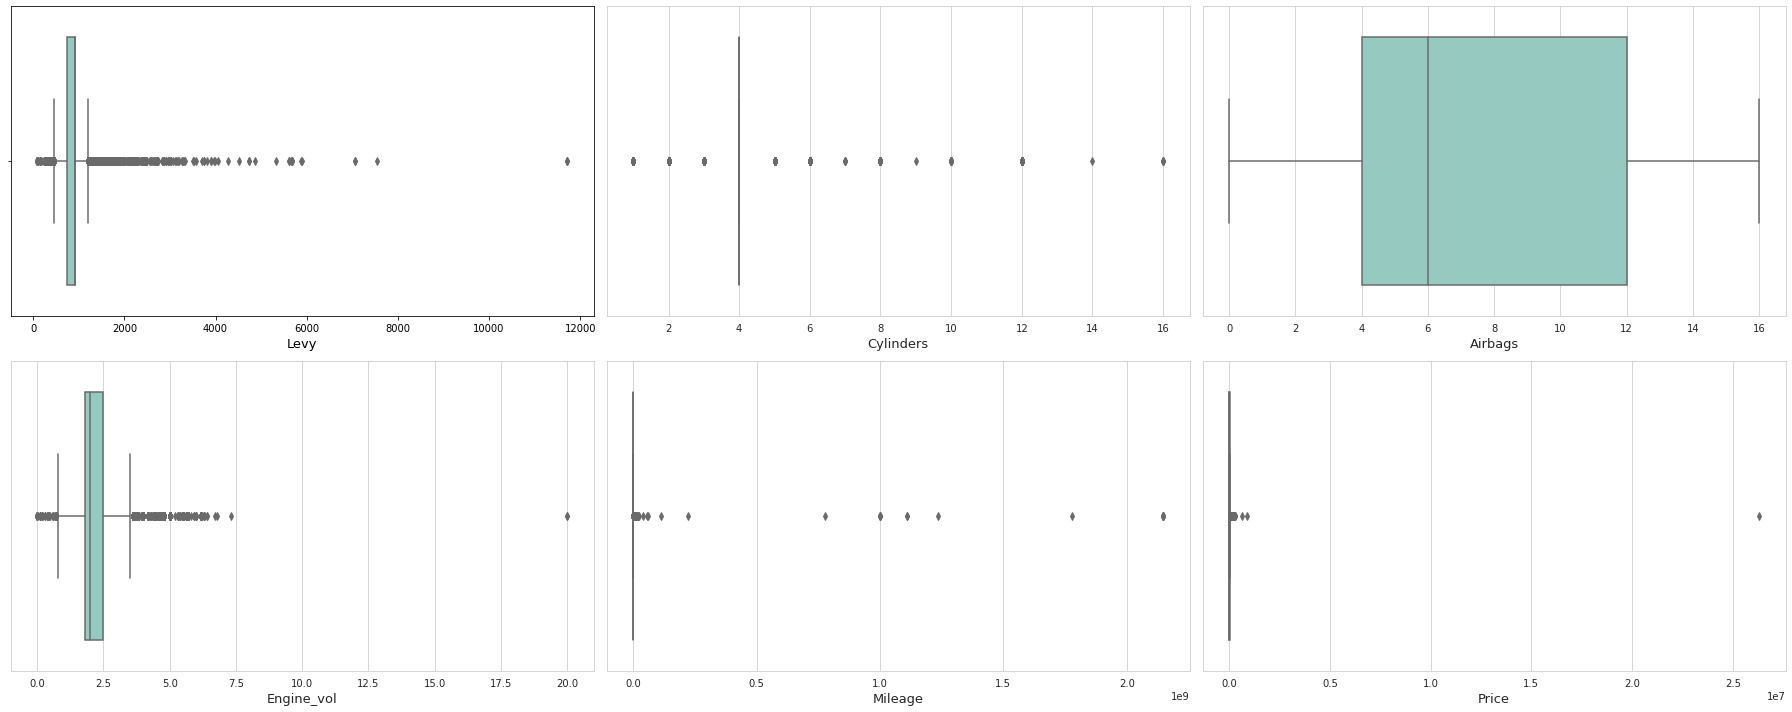

In [38]:
plt.figure(figsize=(25, 10))

j = 1
for i in df[numeric].columns:
    plt.subplot(2, 3, j)
    sns.set_style('whitegrid')
    sns.boxplot(df[i],palette = 'Set3')
    plt.xlabel('{}'.format(i), fontsize=13)
    plt.tight_layout()
    j += 1

In [39]:
cols = ['Levy', 'Mileage','Engine_vol', 'Price']

for col in cols:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iqr = q1 - q2
    upper_limit = q1 + 1.5 * iqr
    lower_limit = q2 - 1.5 * iqr
    df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]

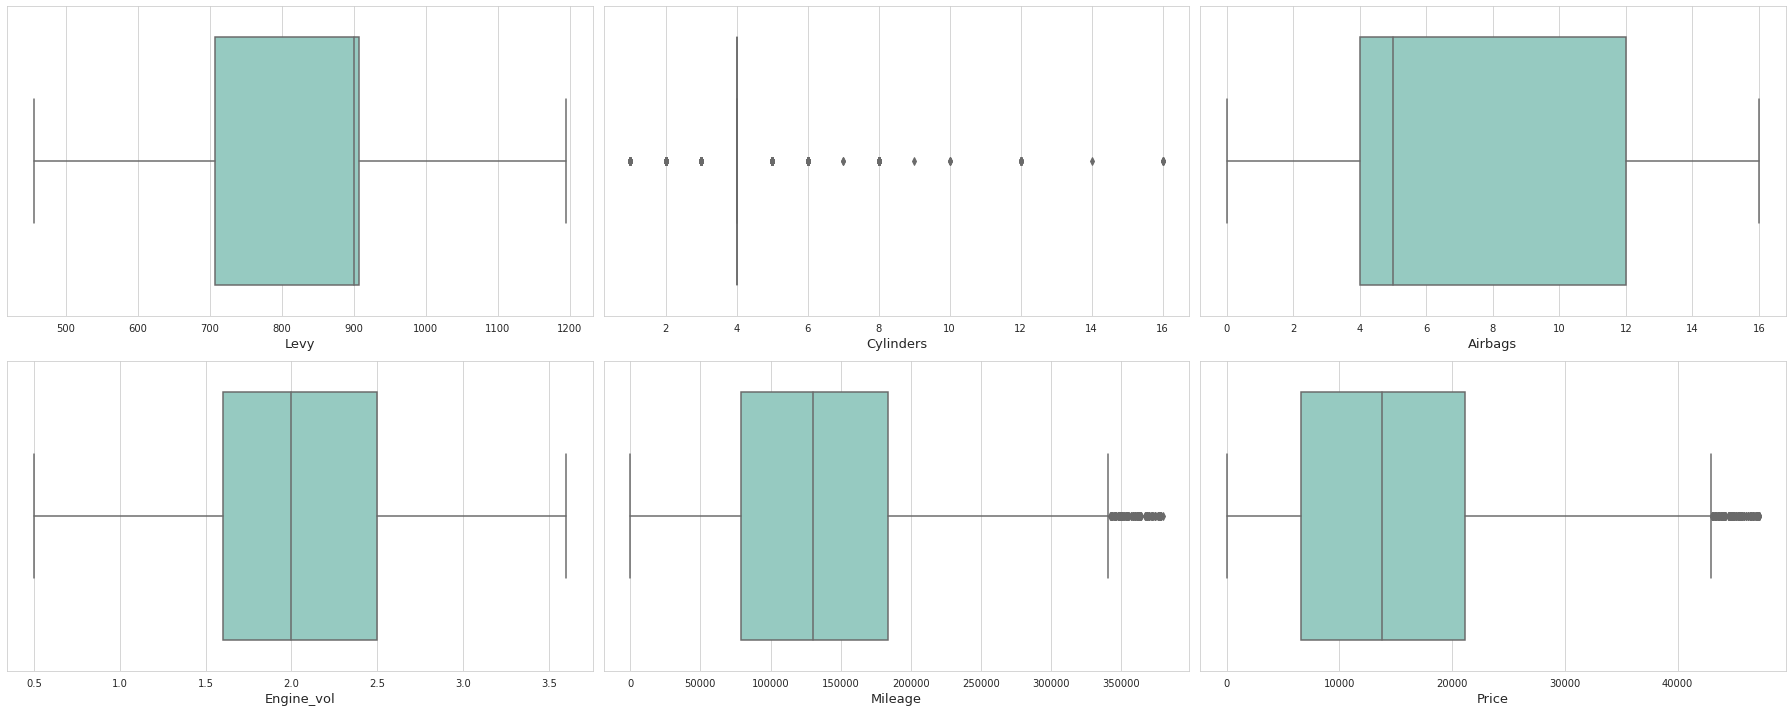

In [40]:
plt.figure(figsize=(25, 10))

j = 1
for i in df[numeric].columns:
    plt.subplot(2, 3, j)
    sns.set_style('whitegrid')
    sns.boxplot(df[i],palette = 'Set3')
    plt.xlabel('{}'.format(i), fontsize=13)
    plt.tight_layout()
    j += 1

In [41]:
df

,Prod_year,Cylinders,Airbags,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_vol,Mileage,Gear_type,Drive_wheels,Doors,Wheel,Color,Engine_type,Price
1,2011,6,8,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,Tiptronic,4x4,nan,Left wheel,Black,Non Turbo,16621
2,2006,4,2,906.838128,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,Variator,Front,nan,Right-hand drive,Black,Non Turbo,8467
3,2011,4,0,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,Automatic,4x4,nan,Left wheel,White,Non Turbo,3607
5,2016,4,4,891.000000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,Automatic,Front,nan,Left wheel,White,Non Turbo,39493
6,2010,4,12,761.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909.0,Automatic,Front,nan,Left wheel,White,Non Turbo,1803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,2013,6,12,1055.000000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,3.5,107800.0,Automatic,Rear,nan,Left wheel,Grey,Non Turbo,5802
19232,1999,4,5,906.838128,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000.0,Manual,Rear,nan,Left wheel,Silver,Turbo,8467
19233,2011,4,8,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,Tiptronic,Front,nan,Left wheel,Red,Non Turbo,15681
19234,2010,4,4,836.000000,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365.0,Automatic,Front,nan,Left wheel,Grey,Non Turbo,26108


# **EDA**

## **Visualising Data with Plots**

### **Distribution Plot of Price**

In [42]:
from matplotlib.pyplot import figure

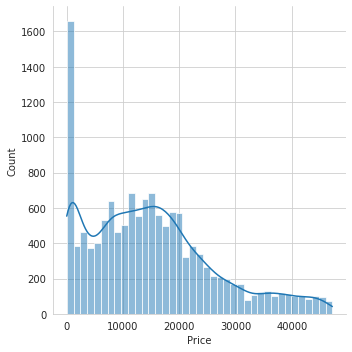

In [43]:
sns.displot(df['Price'],kde=True)

<Figure size 1440x2160 with 0 Axes>

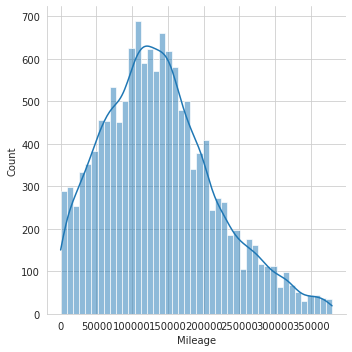

In [44]:
plt.figure(figsize=(20,30))
sns.displot(data=df, x="Mileage", kde=True)

### **Product Year Vs. Count of Cars Bar Plot**

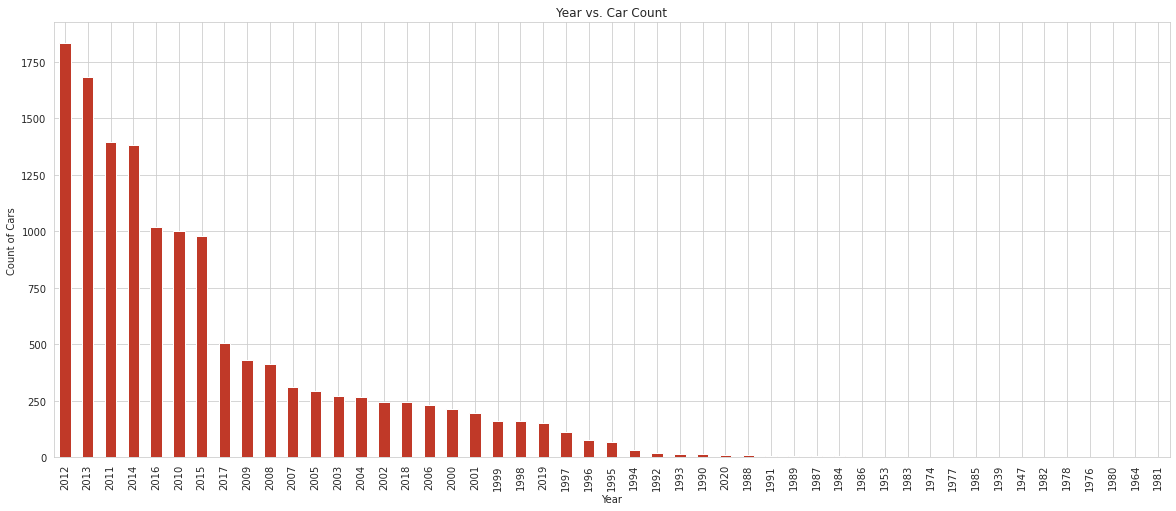

In [45]:
plt.figure(figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('Count of Cars')

df['Prod_year'].value_counts().plot(kind='bar', title='Year vs. Car Count', color='#C03928')

### **Visualing of Average Price VS Year**

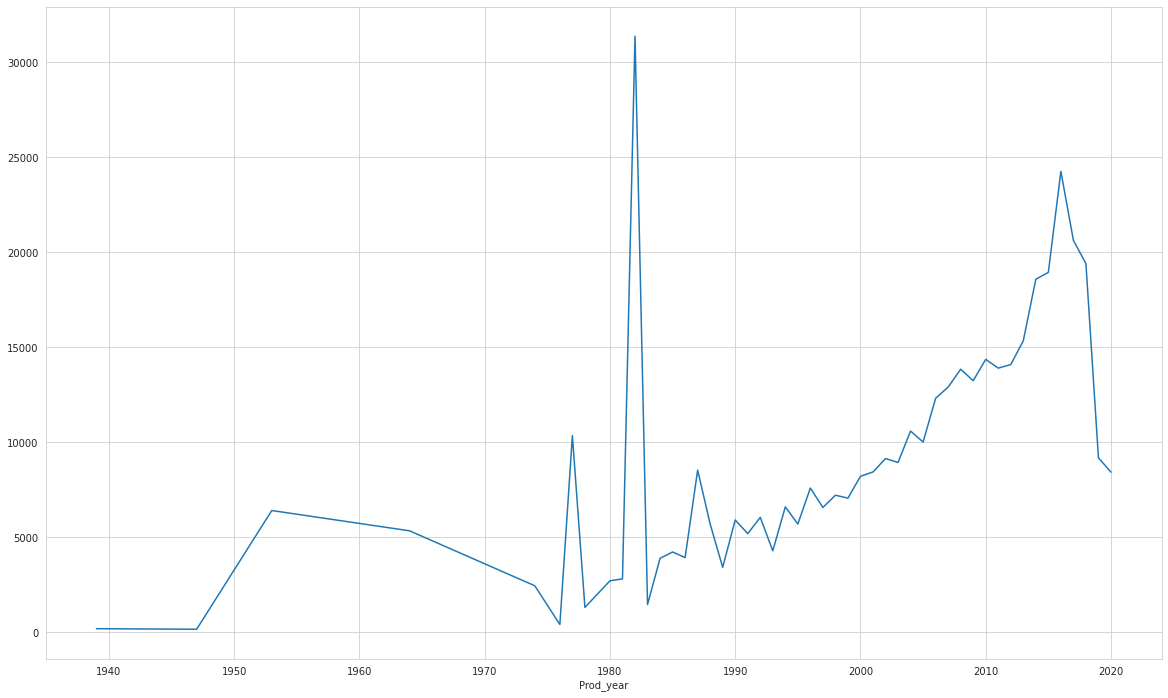

In [46]:
plt.figure(figsize=(20,12))
year_data = df.groupby('Prod_year')['Price'].mean()
sns.lineplot(x=year_data.index,y=year_data.values)

The highest average price was recorded between 1980 and 1985 (i.e.,above 30000).
The sales increased rapidly from 2010-2015, followed by a rapid decrese from 2015-2020.


### **Scatterplots**

Text(0.5, 1.0, 'Price and Engine Volume')

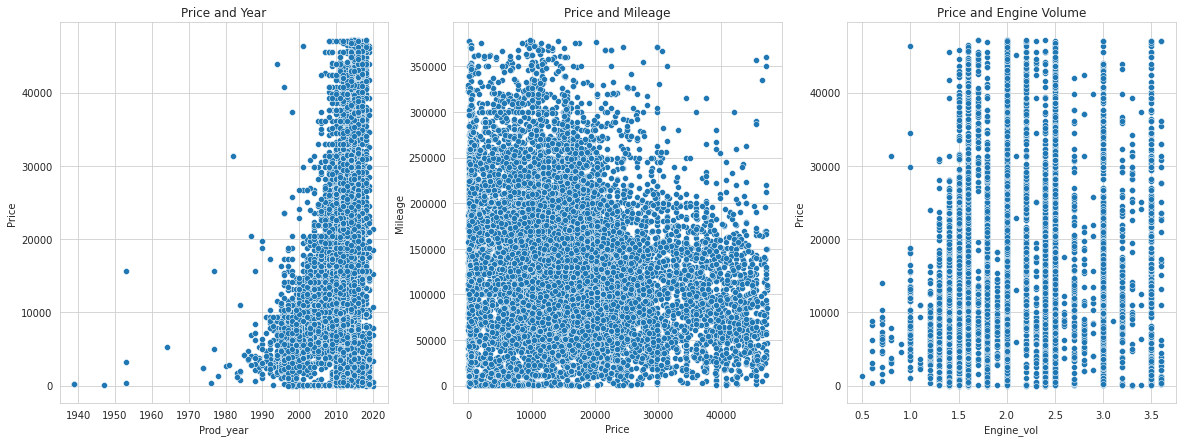

In [47]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Prod_year',y='Price',data=df)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='Engine_vol',data=df)
plt.title("Price and Engine Volume")


Text(0.5, 1.0, 'Price and Engine Volume')

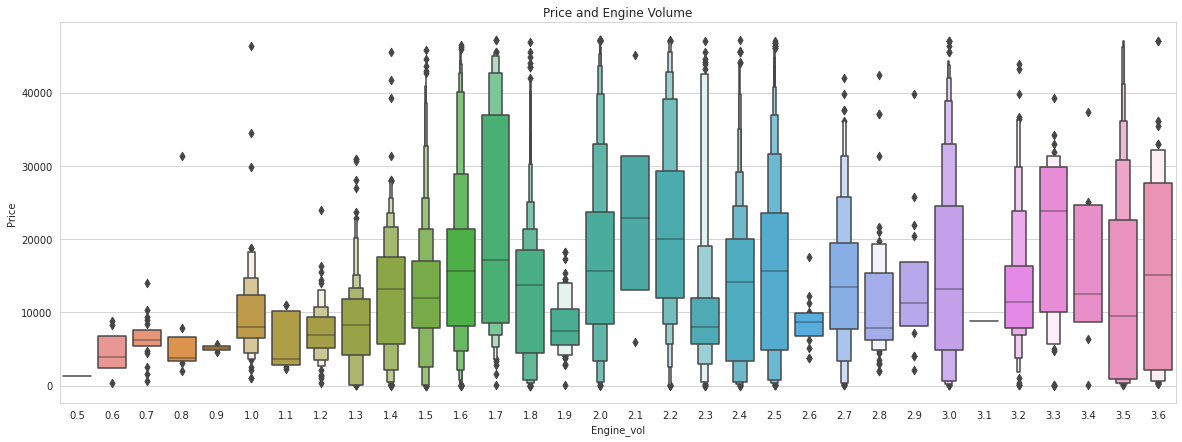

In [48]:
plt.figure(figsize=(20,7))
sns.boxenplot(y='Price',x='Engine_vol',data=df)
plt.title("Price and Engine Volume")

### **Transforming Price into log(Price)**

In [49]:
log_price = np.log(df['Price'])

In [50]:
df['log_price'] = log_price
df

,Prod_year,Cylinders,Airbags,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_vol,Mileage,Gear_type,Drive_wheels,Doors,Wheel,Color,Engine_type,Price,log_price
1,2011,6,8,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000.0,Tiptronic,4x4,nan,Left wheel,Black,Non Turbo,16621,9.718422
2,2006,4,2,906.838128,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,Variator,Front,nan,Right-hand drive,Black,Non Turbo,8467,9.043932
3,2011,4,0,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,Automatic,4x4,nan,Left wheel,White,Non Turbo,3607,8.190632
5,2016,4,4,891.000000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,Automatic,Front,nan,Left wheel,White,Non Turbo,39493,10.583879
6,2010,4,12,761.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909.0,Automatic,Front,nan,Left wheel,White,Non Turbo,1803,7.497207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,2013,6,12,1055.000000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,3.5,107800.0,Automatic,Rear,nan,Left wheel,Grey,Non Turbo,5802,8.665958
19232,1999,4,5,906.838128,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000.0,Manual,Rear,nan,Left wheel,Silver,Turbo,8467,9.043932
19233,2011,4,8,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,Tiptronic,Front,nan,Left wheel,Red,Non Turbo,15681,9.660205
19234,2010,4,4,836.000000,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365.0,Automatic,Front,nan,Left wheel,Grey,Non Turbo,26108,10.169997


Text(0.5, 1.0, 'Log_Price and Engine Volume')

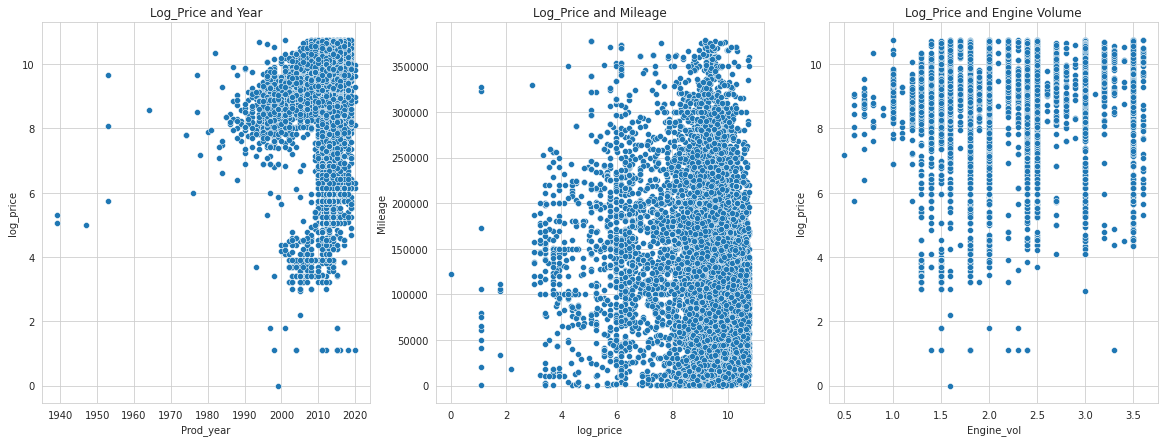

In [51]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log_Price and Year")
sns.scatterplot(x='Prod_year',y='log_price',data=df)

plt.subplot(1,3,2)
plt.title("Log_Price and Mileage")
sns.scatterplot(x='log_price',y='Mileage',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='Engine_vol',data=df)
plt.title("Log_Price and Engine Volume")

### **Bar Graph Manufacturer VS Average price**

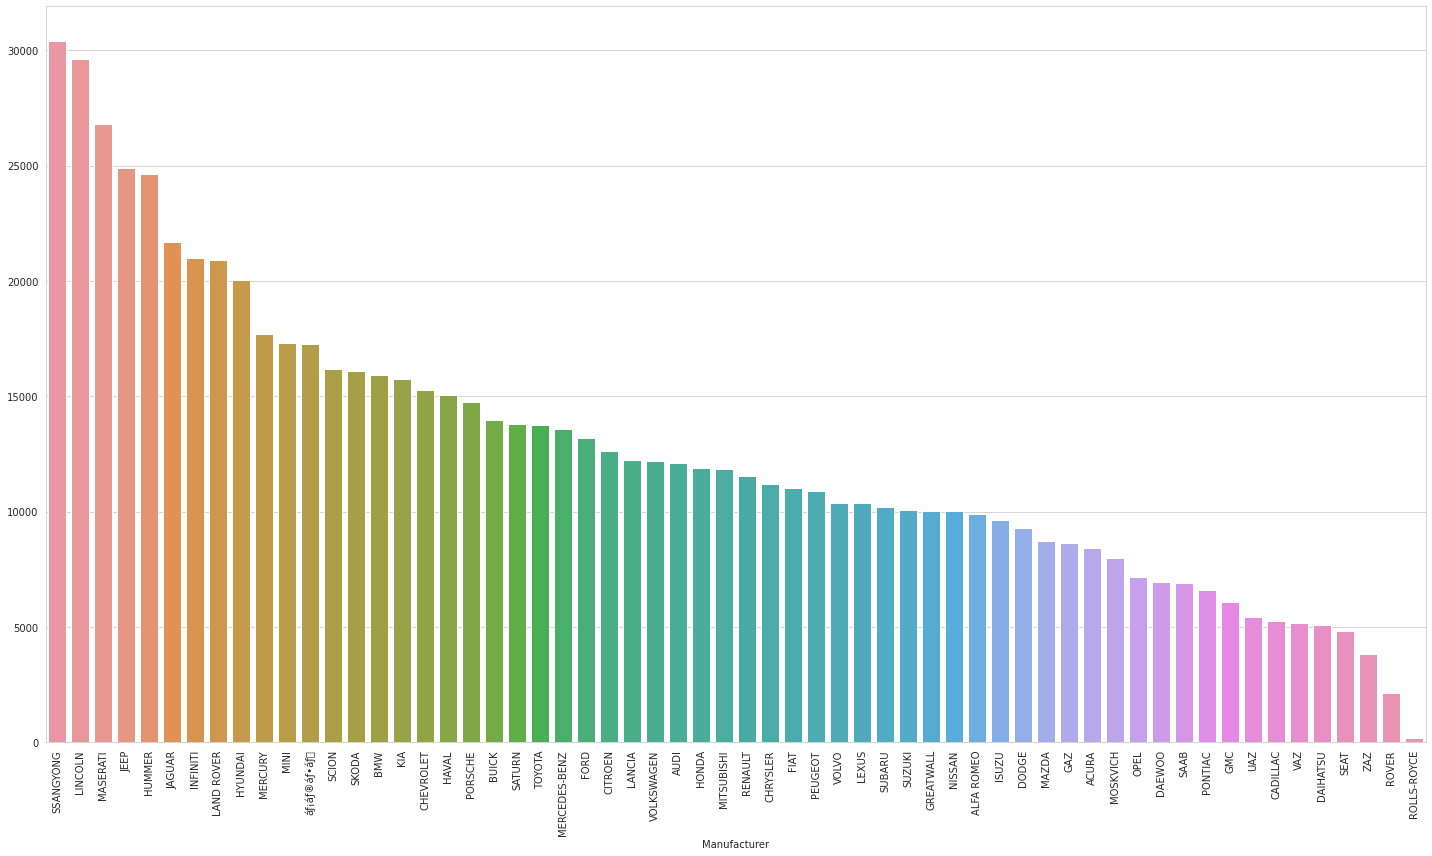

In [52]:
plt.figure(figsize=(20,12))
year_data = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=year_data.index,y=year_data.values)
plt.xticks(rotation=90)
plt.tight_layout()

The Manufacturer 54 has the highest average sales (i.e, around 30000).
The Manufacturer 47 has the lowest average sale (i.e., very less).

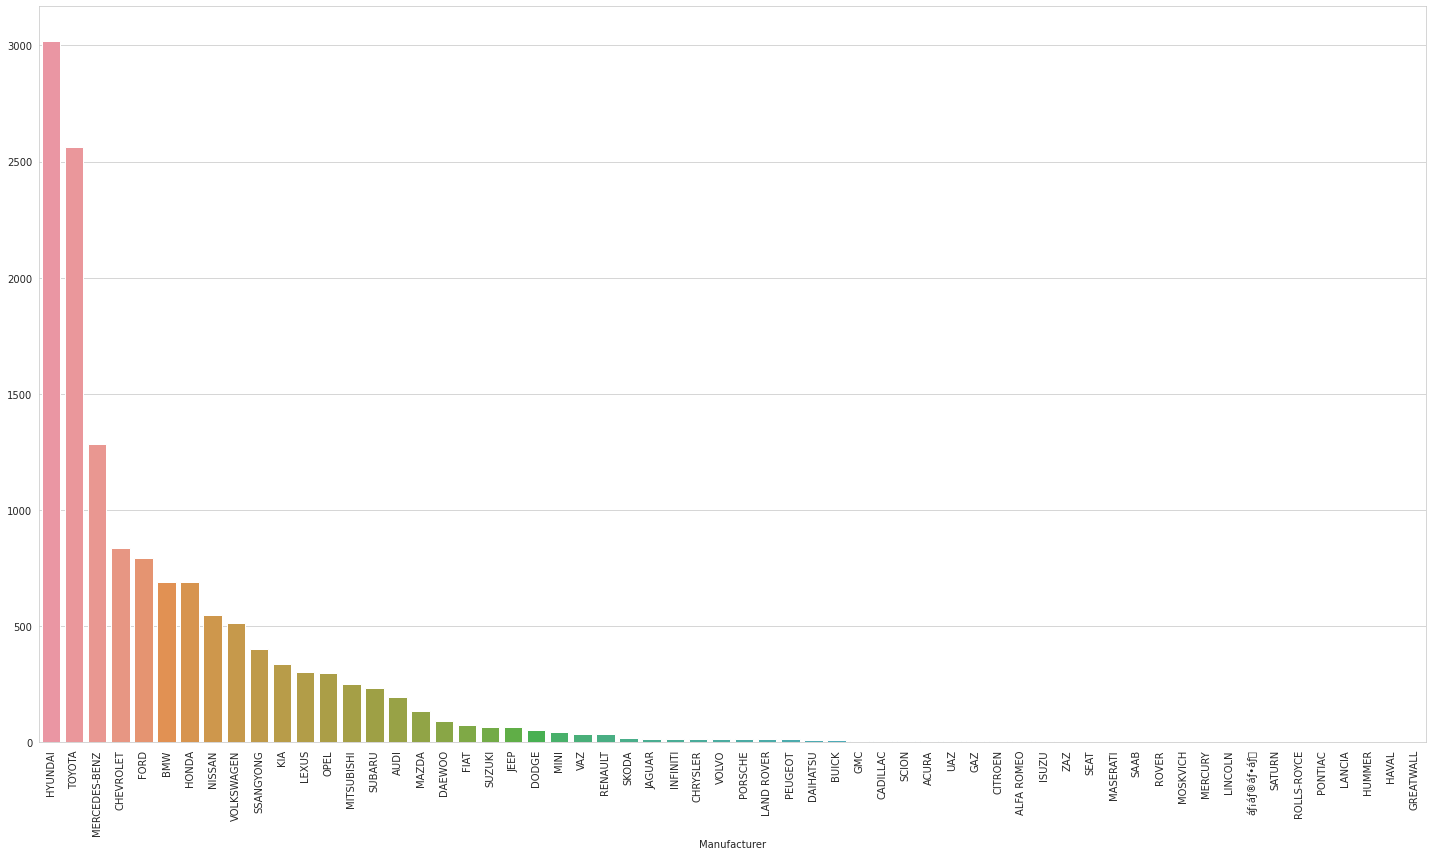

In [53]:
plt.figure(figsize=(20,12))
year_data = df.groupby('Manufacturer')['Price'].count().sort_values(ascending=False)
sns.barplot(x=year_data.index,y=year_data.values)
plt.xticks(rotation=90)
plt.tight_layout()

From both the above graphs, we can say that whenever the prices are extreme the no. of people buying them is very low.
This makes sense since, the number of costly cars available is quite less. 

### **Line Plot showing Levy VS Price**

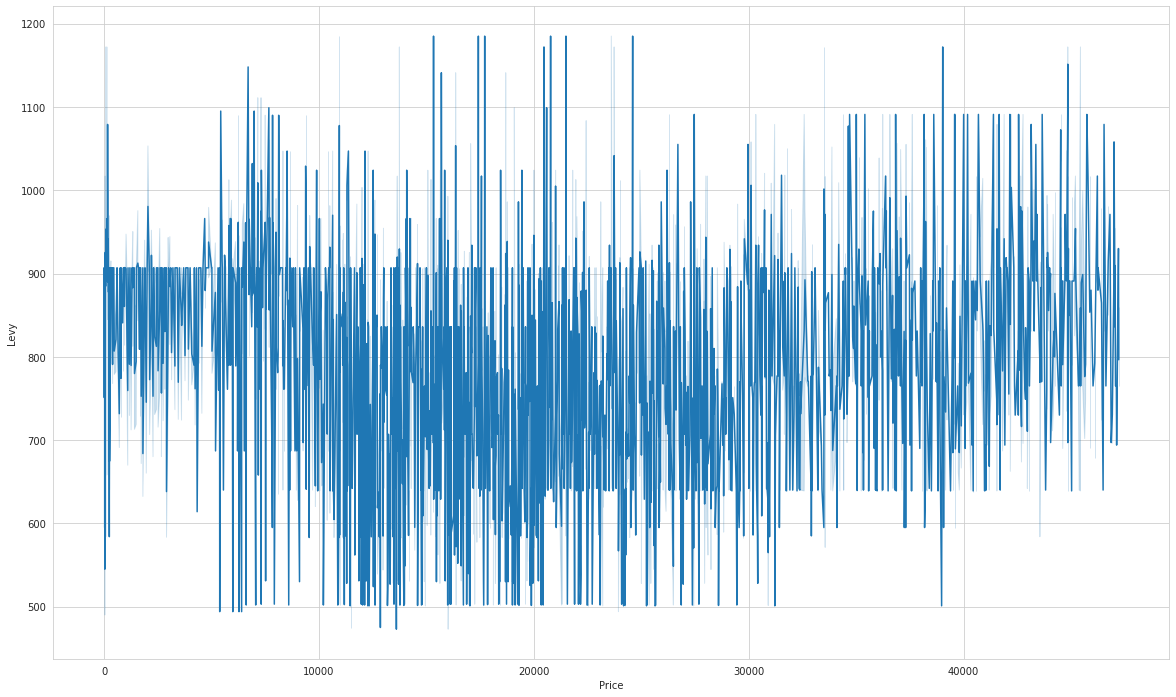

In [54]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Price',y='Levy',data=df)

There exist a linearly upward trend between price and levy from around 4000 and above.

### **Bar Plot for Airbags vs. Price**

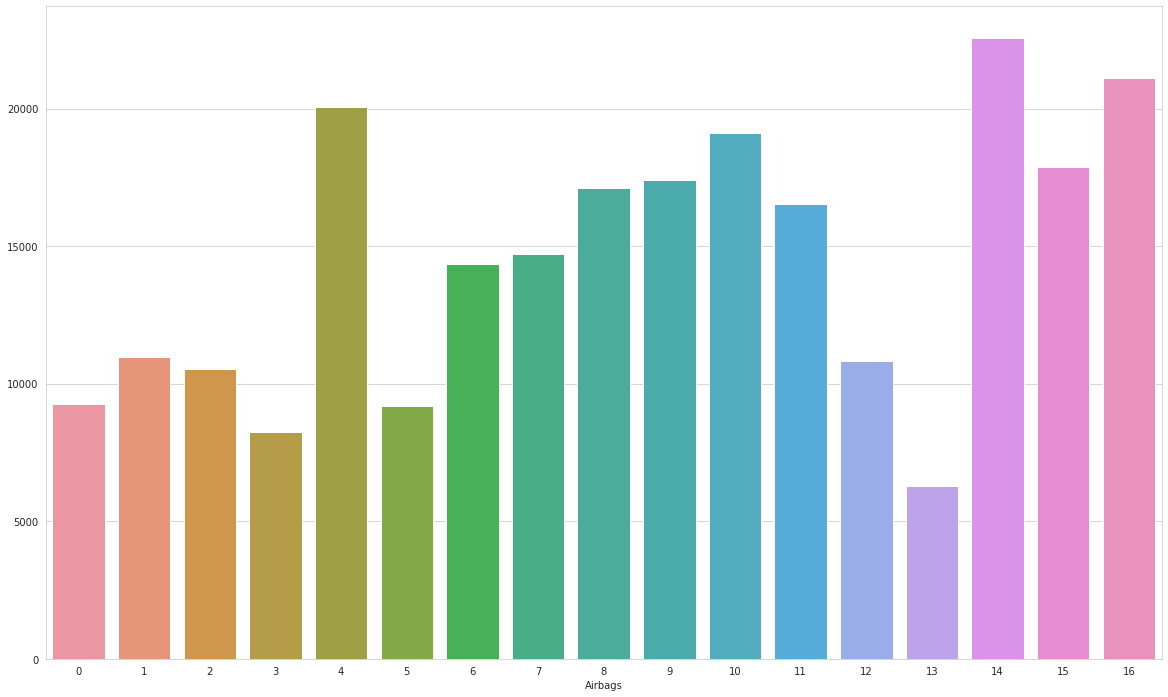

In [55]:
plt.figure(figsize=(20,12))
data_air = df.groupby('Airbags')['Price'].mean().sort_values()
sns.barplot(x=data_air.index, y=data_air.values)

The cars with 14 number of Airbags tend to be popular have the higest average price.

### **Bar Plot for Color vs. Price**

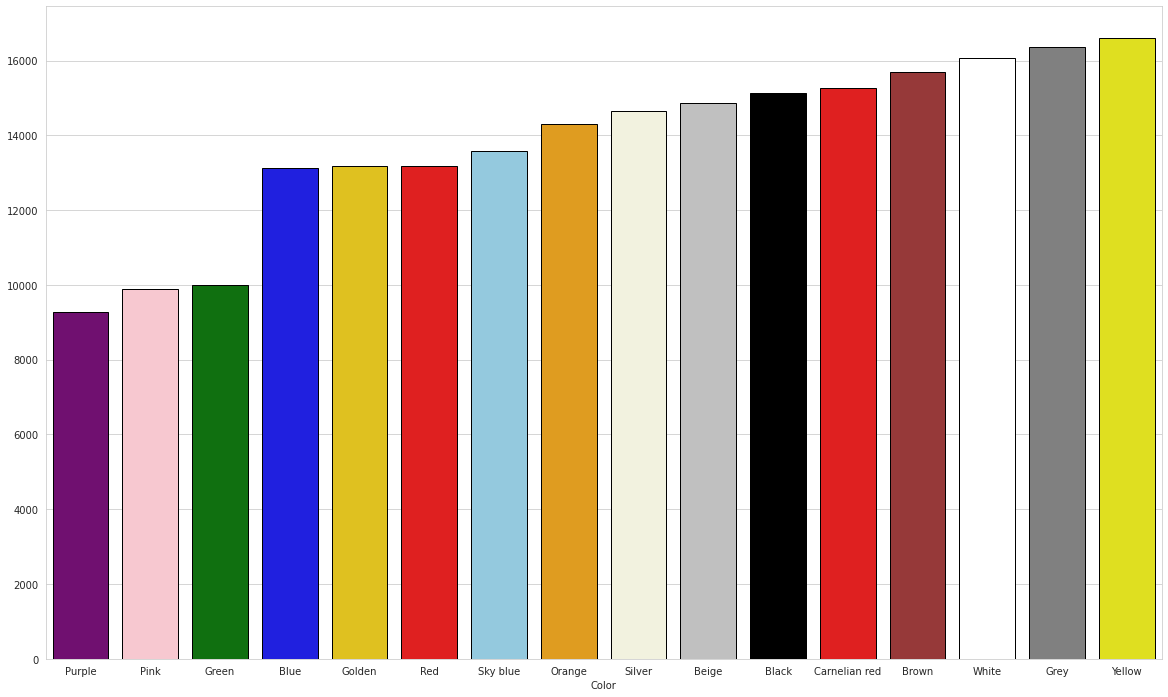

In [56]:
plt.figure(figsize=(20,12))
color = ['purple','pink','green','blue','gold','red','skyblue','orange','beige','silver','black','red','brown','white','grey','yellow']
data_color = df.groupby('Color')['Price'].mean().sort_values()
sns.barplot(x=data_color.index, y=data_color.values,palette = color,edgecolor = 'black')

Yellow coloured cars are the costliest of all, whereas Purple colored cars are the cheapest 

### **Bar Plot for Engine_vol vs. Price**

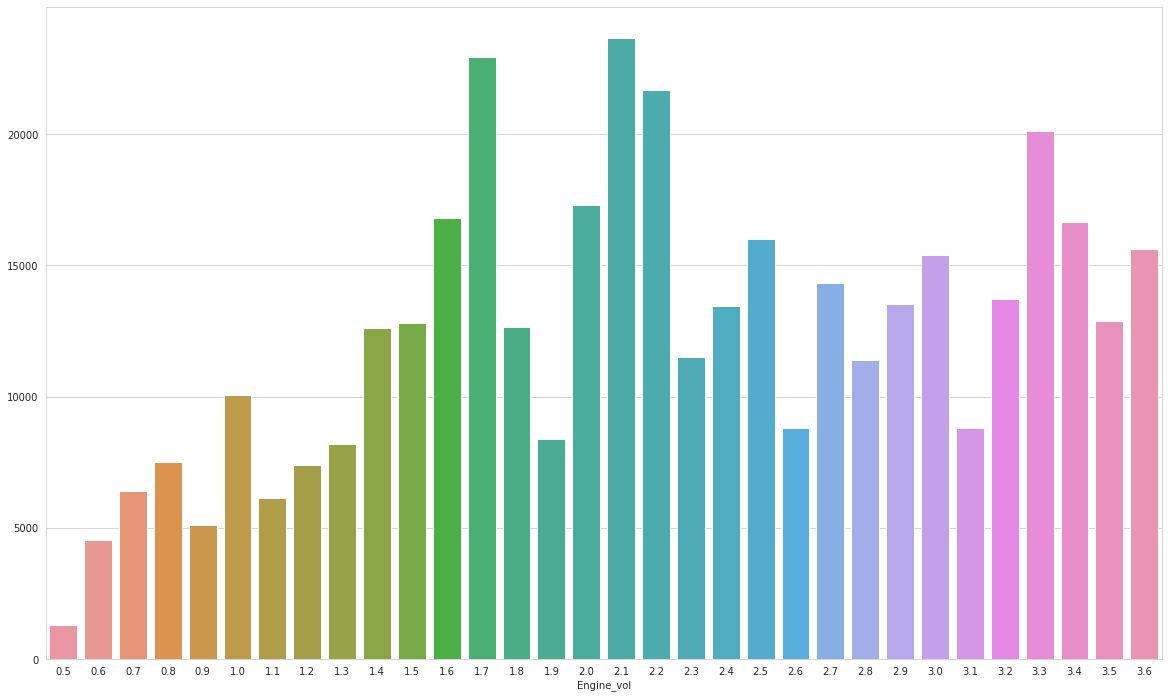

In [57]:
plt.figure(figsize=(20,12))
data_vol = df.groupby('Engine_vol')['Price'].mean().sort_values()
sns.barplot(x=data_vol.index, y=data_vol.values)

Vehicles with engine volume, 2.1 tend to have the highest prices, and engine volume 0.9 tend to have the least prices. 

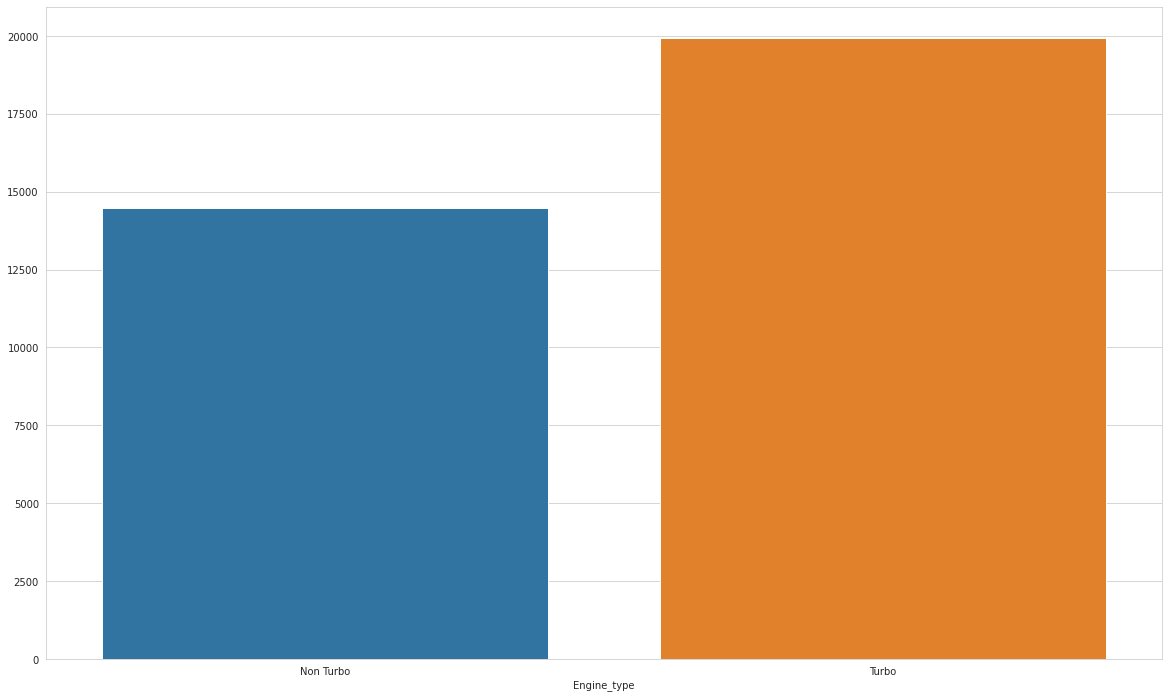

In [58]:
plt.figure(figsize=(20,12))
data_type = df.groupby('Engine_type')['Price'].mean()
sns.barplot(x=data_type.index, y=data_type.values)

Engines with Turbo types usually tend to have a higher price.

### **Bar Graph for Category vs Mileage**

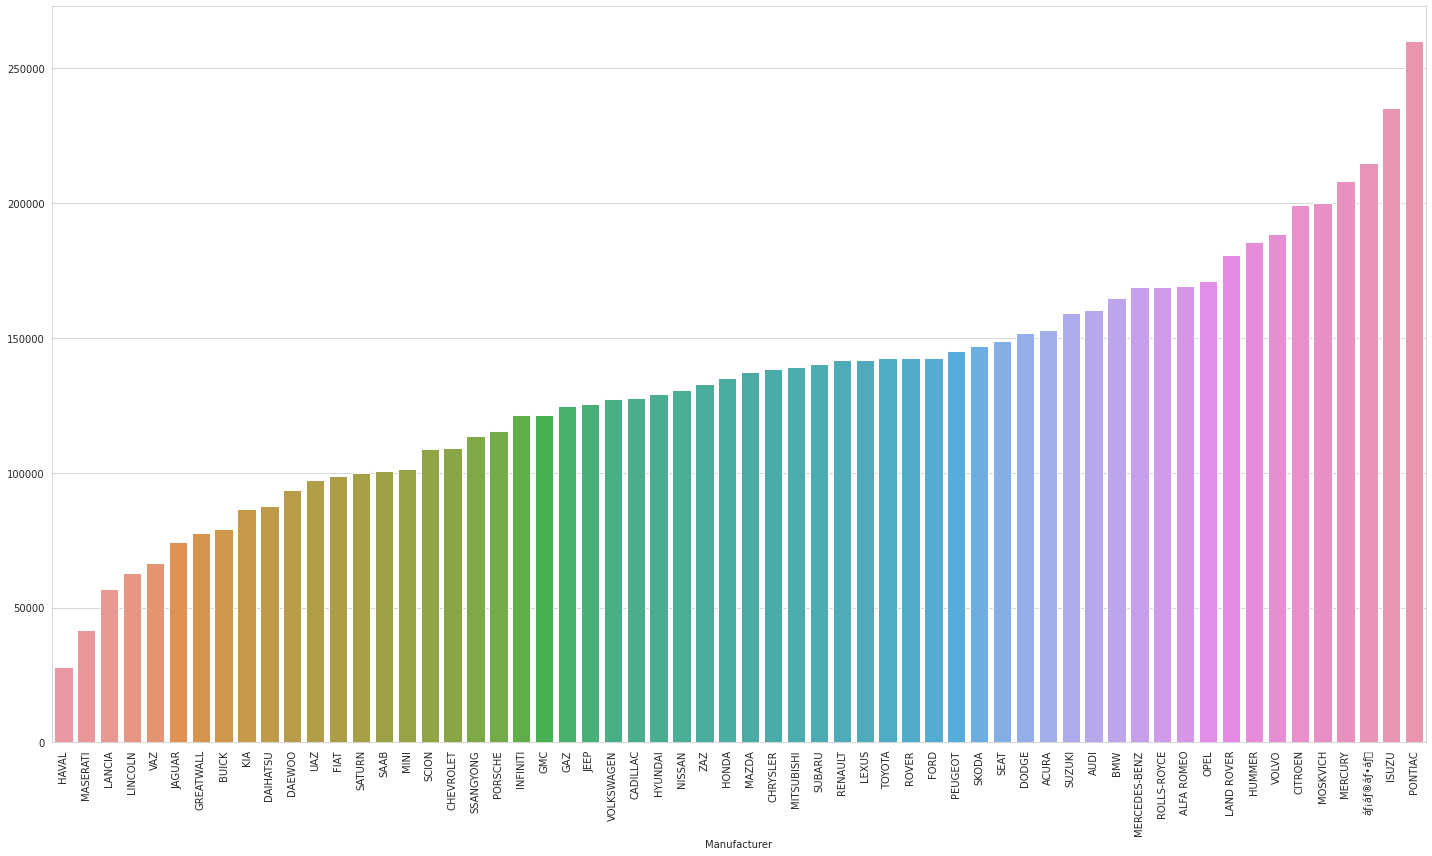

In [59]:
plt.figure(figsize=(20,12))
data_diesel = df.groupby('Manufacturer')['Mileage'].mean().sort_values()
sns.barplot(x=data_diesel.index, y=data_diesel.values)
plt.xticks(rotation=90)
plt.tight_layout()

### **Bar Graph Category vs. Price**

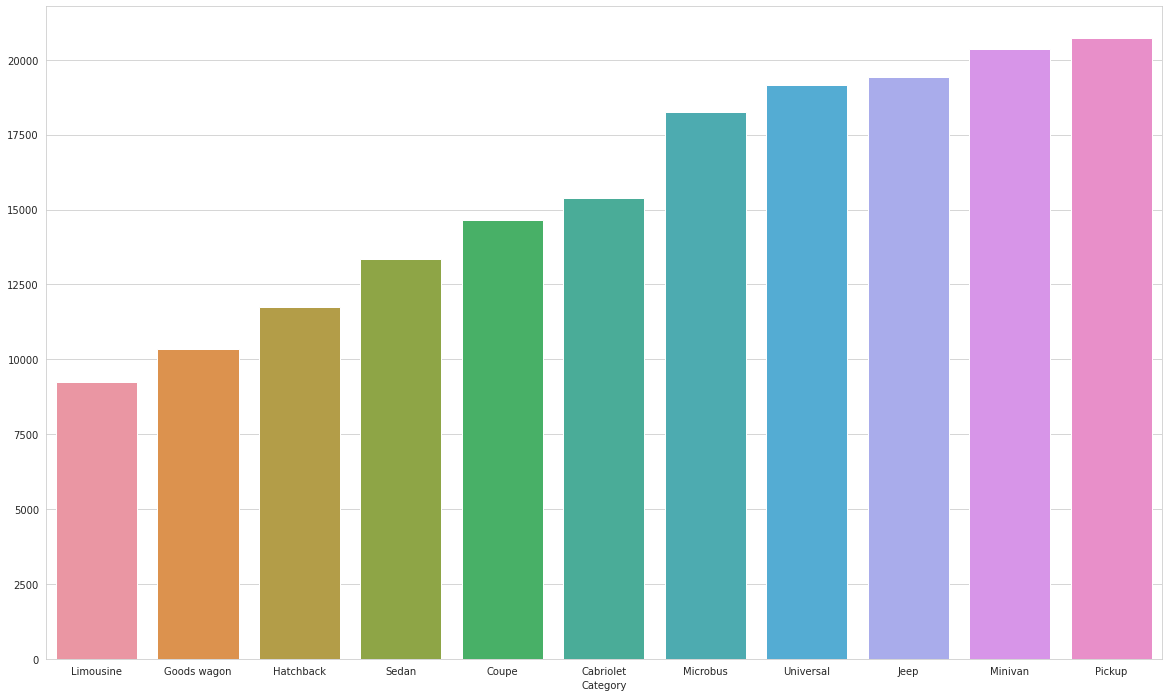

In [60]:
plt.figure(figsize=(20,12))
data_category = df.groupby('Category')['Price'].mean().sort_values()
sns.barplot(x=data_category.index, y=data_category.values)

Pickup trucks have the costliest average price, whereas limousines have the the least. 

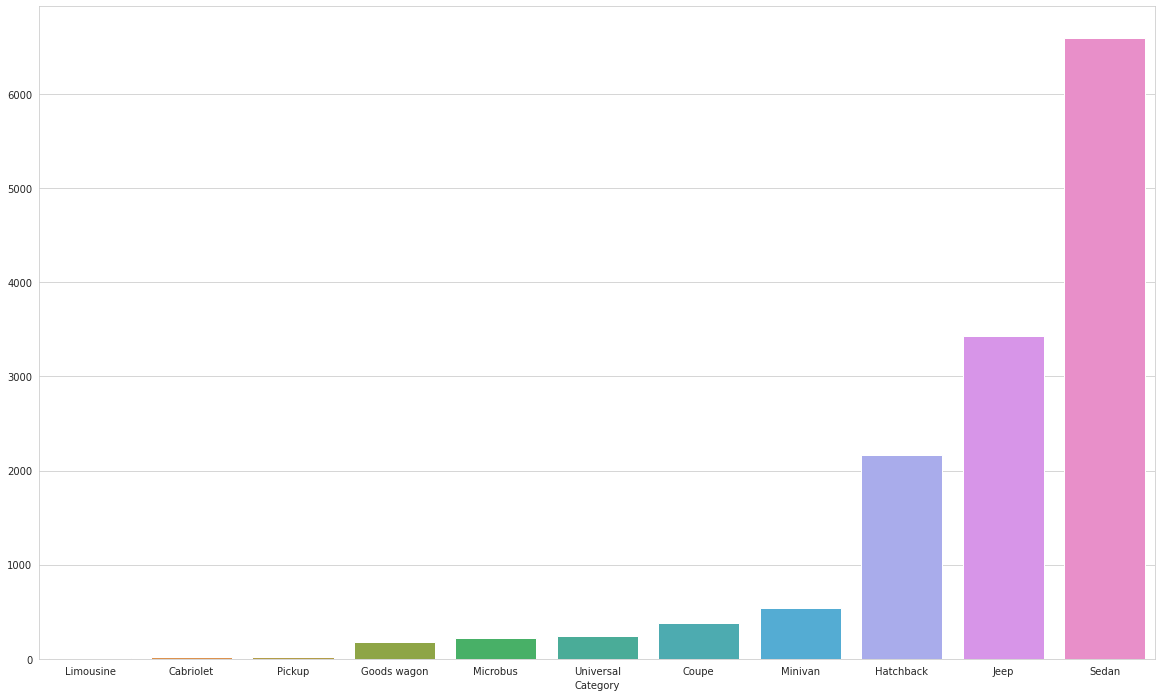

In [61]:
plt.figure(figsize=(20,12))
data_category = df.groupby('Category')['Price'].count().sort_values()
sns.barplot(x=data_category.index, y=data_category.values)

### **Price Vs. Fuel Types**

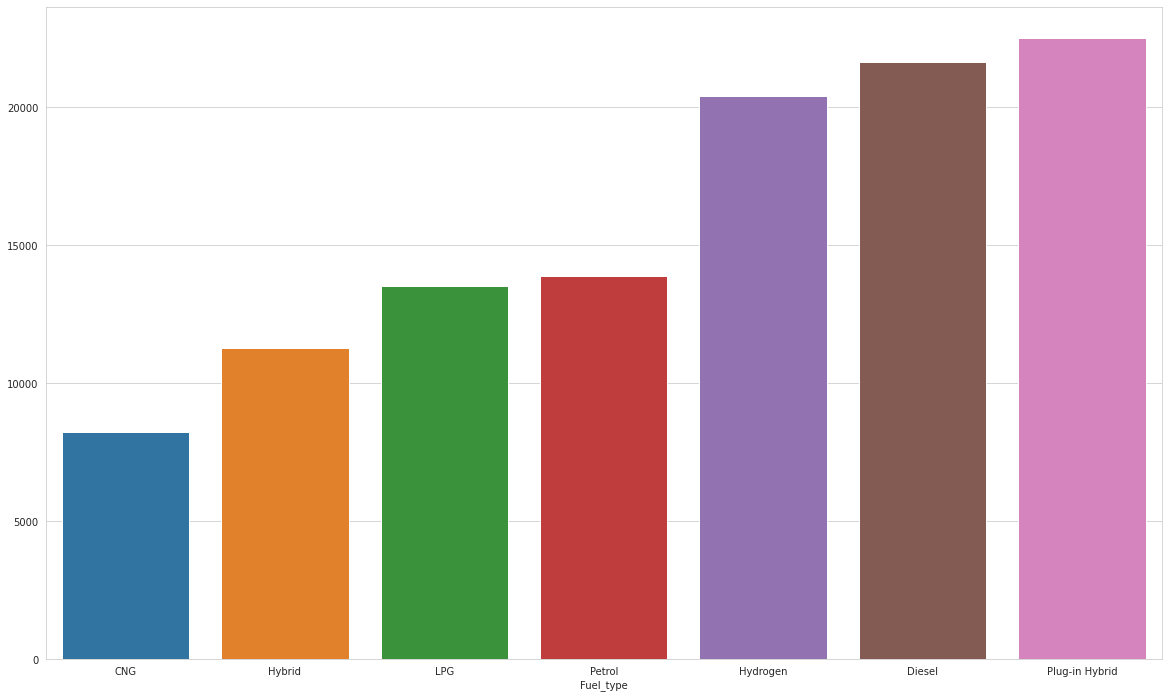

In [62]:
plt.figure(figsize=(20,12))
data_fuel = df.groupby('Fuel_type')['Price'].mean().sort_values()
sns.barplot(x=data_fuel.index, y=data_fuel.values)

In [63]:
data_fuel

Fuel_type
CNG                8210.896359
Hybrid            11282.393000
LPG               13527.488851
Petrol            13881.394309
Hydrogen          20385.000000
Diesel            21634.085473
Plug-in Hybrid    22516.835821
Name: Price, dtype: float64

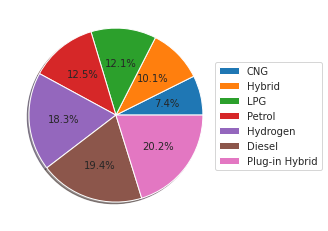

In [64]:
plt.pie(data_fuel,shadow=True,autopct='%1.1f%%')
plt.legend(['CNG','Hybrid','LPG','Petrol','Hydrogen','Diesel','Plug-in Hybrid'],bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)

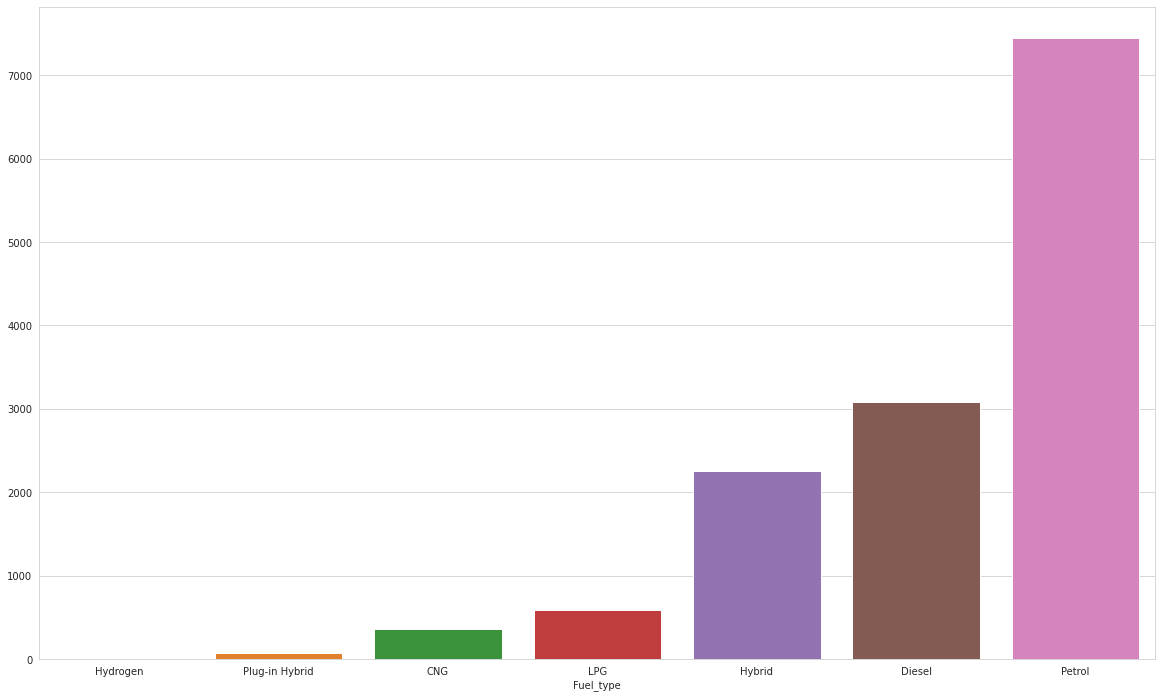

In [65]:
plt.figure(figsize=(20,12))
data_diesel = df.groupby('Fuel_type')['Price'].count().sort_values()
sns.barplot(x=data_diesel.index, y=data_diesel.values)

### **Price vs. Gear Type**

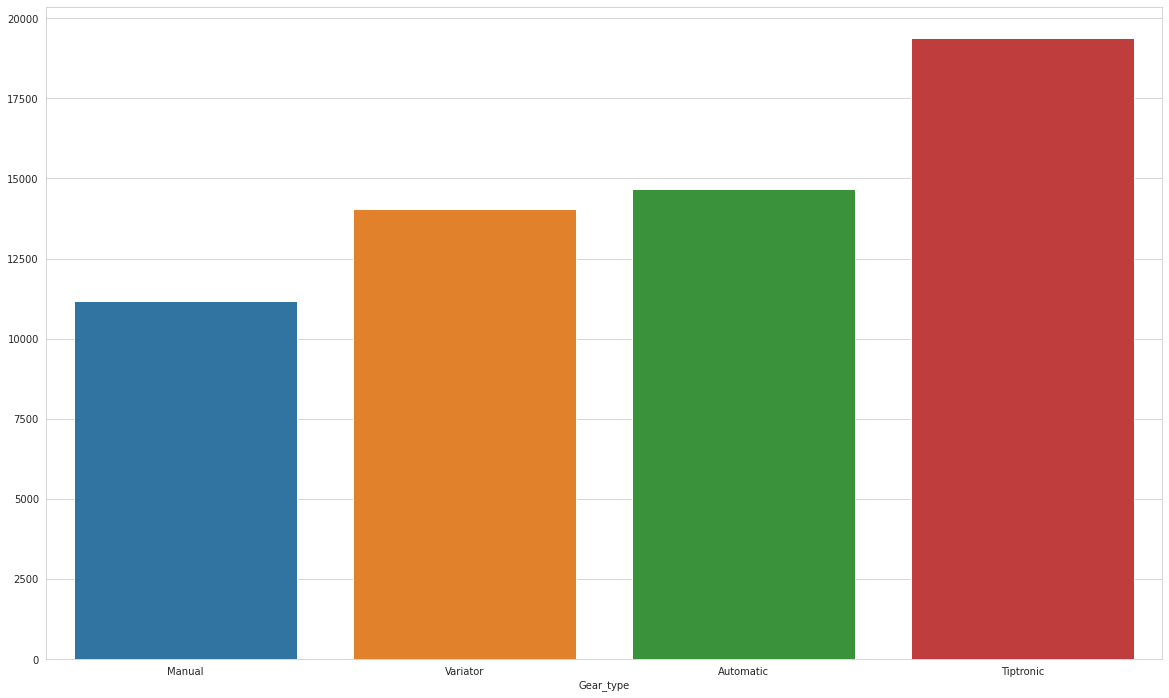

In [66]:
plt.figure(figsize=(20,12))
data_gear = df.groupby('Gear_type')['Price'].mean().sort_values()
sns.barplot(x=data_gear.index, y=data_gear.values)

In [67]:
data_gear

Gear_type
Manual       11174.754190
Variator     14038.890476
Automatic    14670.727128
Tiptronic    19396.789382
Name: Price, dtype: float64

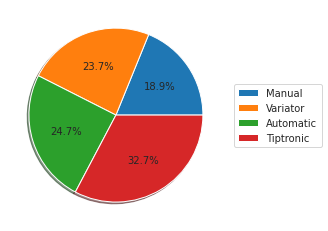

In [68]:
plt.pie(data_gear,shadow=True,autopct='%1.1f%%')
plt.legend(['Manual','Variator','Automatic','Tiptronic'],bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)

### **Price vs. Drive_wheels**

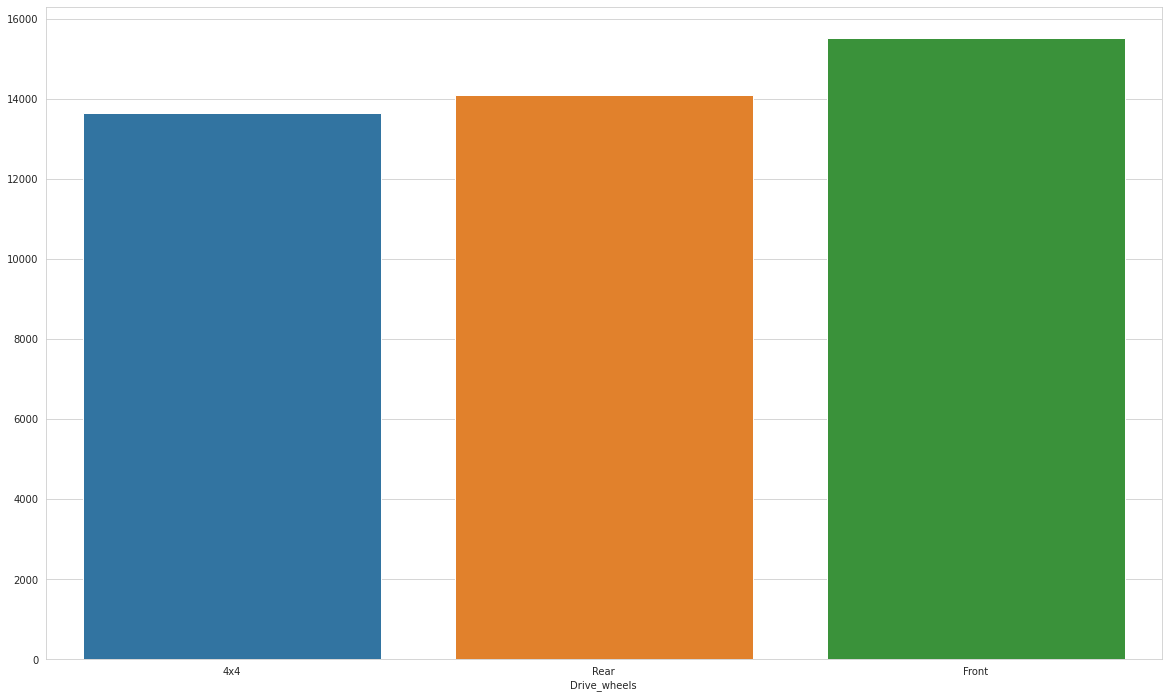

In [69]:
plt.figure(figsize=(20,12))
data_wheels = df.groupby('Drive_wheels')['Price'].mean().sort_values()
sns.barplot(x=data_wheels.index, y=data_wheels.values)

### **Heat Map of Data**

<function matplotlib.pyplot.show(*args, **kw)>

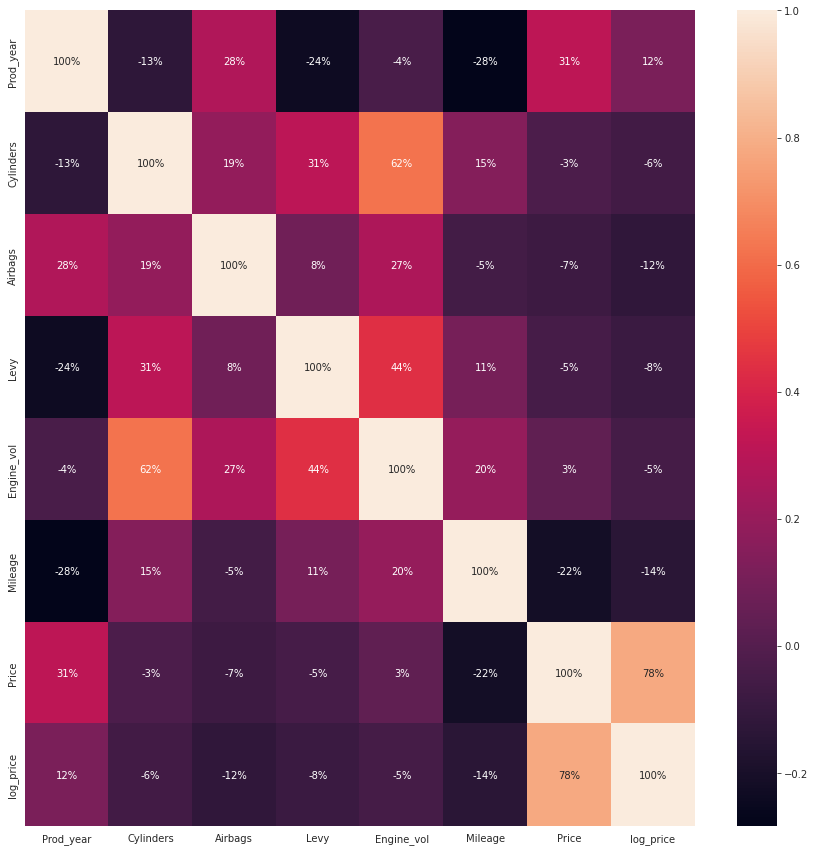

In [70]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt = '0.0%')
plt.show

# **Feature Selection**

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Mileage','Prod_year','Cylinders','Airbags','Engine_vol']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.305340,Mileage
1,27.704490,Prod_year
2,42.501374,Cylinders
3,3.788452,Airbags
4,25.266561,Engine_vol


In [72]:
df = df.drop(['Cylinders','Engine_vol','Airbags','log_price'], axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

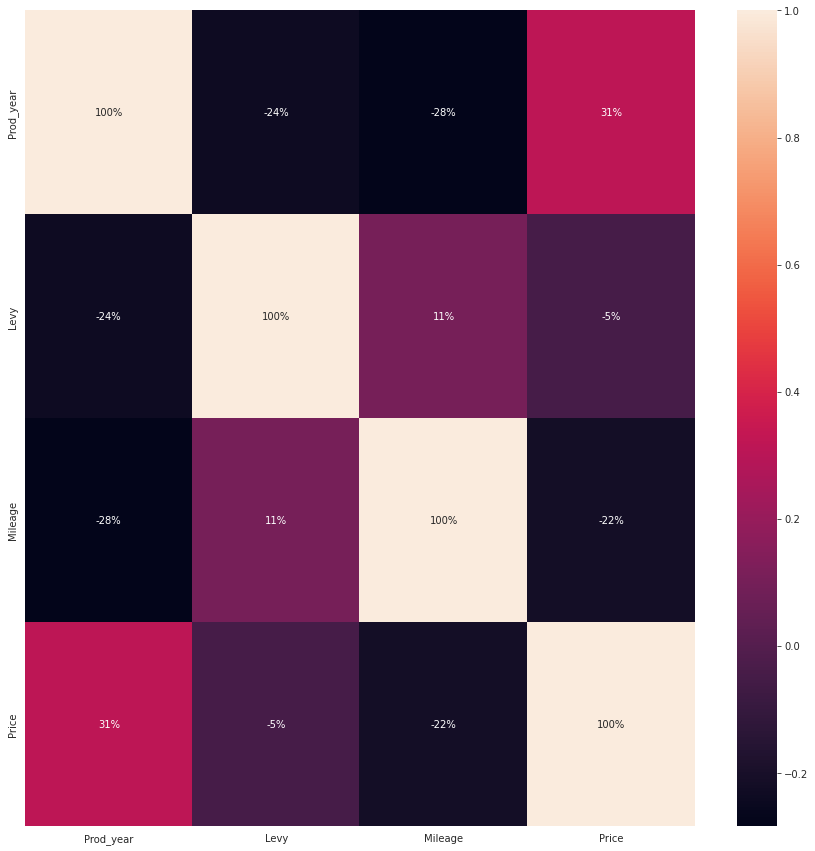

In [73]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt = '0.0%')
plt.show

In [ ]:
#plt.subplots(figsize=(15,15))
#sns.heatmap(df.corr(), annot = True, fmt = '0.0%')
#plt.show

In [ ]:
#df.rename(columns = {'encoded_Plug-in Hybrid':'encoded_PluginHybrid'}, inplace = True)

In [ ]:
#df.rename(columns = {'encoded_>5':'encoded_GreaterThan5'}, inplace = True)

In [74]:
df

,Prod_year,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Mileage,Gear_type,Drive_wheels,Doors,Wheel,Color,Engine_type,Price
1,2011,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,192000.0,Tiptronic,4x4,nan,Left wheel,Black,Non Turbo,16621
2,2006,906.838128,HONDA,FIT,Hatchback,No,Petrol,200000.0,Variator,Front,nan,Right-hand drive,Black,Non Turbo,8467
3,2011,862.000000,FORD,Escape,Jeep,Yes,Hybrid,168966.0,Automatic,4x4,nan,Left wheel,White,Non Turbo,3607
5,2016,891.000000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,160931.0,Automatic,Front,nan,Left wheel,White,Non Turbo,39493
6,2010,761.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,258909.0,Automatic,Front,nan,Left wheel,White,Non Turbo,1803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,2013,1055.000000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,107800.0,Automatic,Rear,nan,Left wheel,Grey,Non Turbo,5802
19232,1999,906.838128,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,300000.0,Manual,Rear,nan,Left wheel,Silver,Turbo,8467
19233,2011,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,161600.0,Tiptronic,Front,nan,Left wheel,Red,Non Turbo,15681
19234,2010,836.000000,HYUNDAI,Tucson,Jeep,Yes,Diesel,116365.0,Automatic,Front,nan,Left wheel,Grey,Non Turbo,26108


# **Encoding**

In [75]:
y=df['Price']
x=df.drop(['Price'],axis=1)

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("encoder", OneHotEncoder(), list(['Manufacturer','Model','Category','Leather_interior','Fuel_type','Gear_type','Drive_wheels','Doors','Wheel','Color','Engine_type']))], remainder = 'passthrough')
x = ct.fit_transform(x)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)

# **Models & Algorithms**

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

## **Linear Regression**

### **Model 1**

In [79]:
model = LinearRegression()

In [80]:
model.fit(x_train,y_train)

LinearRegression()

In [81]:
y_pred_lr = model.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
msle_lr = mean_squared_error(y_test, y_pred_lr)
rmsle_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr

6089.999533627183

## **Boosting**

### **Gradient Boosting**

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
gbc=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_features=5, n_estimators=1000,
                          random_state=100)

In [84]:
y_pred = gbc.predict(x_test)
mae_gbr = mean_absolute_error(y_test, y_pred)
msle_gbr = mean_squared_error(y_test, y_pred)
rmsle_gbr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gbr = r2_score(y_test, y_pred)
mae_gbr

6427.417150455333

### **Ada Boost**

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
abr=AdaBoostRegressor(n_estimators=1000,learning_rate=0.05,random_state=100)
abr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=1000, random_state=100)

In [87]:
y_pred = abr.predict(x_test)
mae_ab = mean_absolute_error(y_test, y_pred)
msle_ab = mean_squared_error(y_test, y_pred)
rmsle_ab = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ab = r2_score(y_test, y_pred)
mae_ab

6972.051170029478

###**XG Boosting**

In [88]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from xgboost import XGBRegressor 

In [89]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=1000,random_state=100)
clf.fit(x_train, y_train)
predicted=clf.predict(x_test)

[14:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
y_pred = clf.predict(x_test)
y_pred

array([19653.5  , 17384.777, 18337.838, ..., 14903.137,  4176.015,
        5422.525], dtype=float32)

In [91]:
mae_xgb = mean_absolute_error(y_test, y_pred)
msle_xgb = mean_squared_error(y_test, y_pred)
rmsle_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)
mae_xgb

4706.889381981104

## **Bagging**

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

In [ ]:
#model = BaggingRegressor()
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
#print((abs(np.mean(n_scores))))

## **Decision Tree Regressor**

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 
regression_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', min_samples_leaf=5)

In [95]:
predicted = regression_model.predict(x_test)
mae_dt = mean_absolute_error(y_test, predicted)
msle_dt = mean_squared_error(y_test, predicted)
rmsle_dt = np.sqrt(mean_squared_error(y_test, predicted))
r2_dt = r2_score(y_test, predicted)
mae_dt

4488.391695169859

## **Random Forest Regression**

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 100)

In [98]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [99]:
predicted = regressor.predict(x_test)
mae_rf = mean_absolute_error(y_test, predicted)
msle_rf = mean_squared_error(y_test, predicted)
rmsle_rf = np.sqrt(mean_squared_error(y_test, predicted))
r2_rf = r2_score(y_test, predicted)
mae_rf

3633.753011704735

## **KNN**

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn = KNeighborsRegressor(n_neighbors=25)

In [102]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [103]:
predicted = knn.predict(x_test)

In [104]:
mae_knn = mean_absolute_error(y_test, predicted)
msle_knn = mean_squared_error(y_test, predicted)
rmsle_knn = np.sqrt(mean_squared_error(y_test, predicted))
r2_knn = r2_score(y_test, predicted)
mae_knn

7956.945125045307

## **SVM**

In [105]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

SVR()

In [106]:
y_pred = regressor.predict(x_test)

In [107]:
mae_svm = mean_absolute_error(y_test, y_pred)
msle_svm = mean_squared_error(y_test, y_pred)
rmsle_svm = np.sqrt(mean_squared_error(y_test, y_pred))
r2_svm = r2_score(y_test, y_pred)
mae_svm

8623.741536519208

## **Neural Network Model**

In [108]:
df.columns

Index(['Prod_year', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather_interior', 'Fuel_type', 'Mileage', 'Gear_type', 'Drive_wheels',
       'Doors', 'Wheel', 'Color', 'Engine_type', 'Price'],
      dtype='object')

In [109]:
len(df.columns)

15

In [110]:
x_test = x_test.toarray()
x_train = x_train.toarray()

In [111]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae']
              )
# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 1500)

Epoch 1/1500
345/345 [==============================] - 1s 2ms/step - loss: 10931.9658 - mae: 10931.9658
Epoch 2/1500
345/345 [==============================] - 1s 2ms/step - loss: 9021.3447 - mae: 9021.3447
Epoch 3/1500
345/345 [==============================] - 1s 2ms/step - loss: 8859.5000 - mae: 8859.5000
Epoch 4/1500
345/345 [==============================] - 1s 2ms/step - loss: 8822.4727 - mae: 8822.4727
Epoch 5/1500
345/345 [==============================] - 1s 2ms/step - loss: 8824.9326 - mae: 8824.9326
Epoch 6/1500
345/345 [==============================] - 1s 2ms/step - loss: 8779.9082 - mae: 8779.9082
Epoch 7/1500
345/345 [==============================] - 1s 2ms/step - loss: 8760.8438 - mae: 8760.8438
Epoch 8/1500
345/345 [==============================] - 1s 2ms/step - loss: 8800.8770 - mae: 8800.8770
Epoch 9/1500
345/345 [==============================] - 1s 2ms/step - loss: 8748.2178 - mae: 8748.2178
Epoch 10/1500
345/345 [==============================] - 1s 2ms/step - 

In [112]:
nn = model.evaluate(x_test,y_test)
nn

87/87 [==============================] - 0s 2ms/step - loss: 6502.9199 - mae: 6502.9199


[6502.919921875, 6502.919921875]

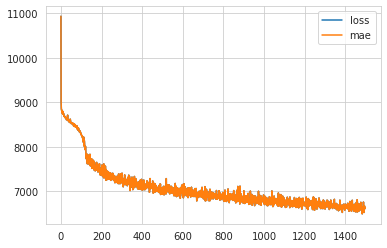

In [113]:
pd.DataFrame(history.history).plot()

# **Final Score Reports**

In [114]:
data = {'Linear regression' : [mae_lr,msle_lr,rmsle_lr,r2_lr],
       'Decision Tree Regressor': [mae_dt,msle_dt,rmsle_dt,r2_dt],
       'Random Forest Regressor': [mae_rf,msle_rf,rmsle_rf,r2_rf],
       'XGBRegressor': [mae_xgb,msle_xgb,rmsle_xgb,r2_xgb],
       'Gradient Boosting Regressor': [mae_gbr,msle_gbr,rmsle_gbr,r2_gbr],
        'Ada Boost Regressor': [mae_ab,msle_ab,rmsle_ab,r2_ab],
        'K-Nearest Neighbours':[mae_knn,msle_knn,rmsle_knn,r2_knn],
        'SVM' : [mae_svm,msle_svm,rmsle_svm,r2_svm],
        'Neural Network':[nn[1],'-','-','-']}

eval_metrics = pd.DataFrame(data, index=['MAE','MSE','RMSE','R^2'])

eval_metrics

,Linear regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor,Gradient Boosting Regressor,Ada Boost Regressor,K-Nearest Neighbours,SVM,Neural Network
MAE,6.090000e+03,4.488392e+03,3.633753e+03,4.706889e+03,6.427417e+03,6.972051e+03,7.956945e+03,8.623742e+03,6502.919922
MSE,6.450097e+07,4.809948e+07,3.552956e+07,4.363501e+07,6.945729e+07,7.805220e+07,1.043504e+08,1.195807e+08,-
RMSE,8.031249e+03,6.935379e+03,5.960668e+03,6.605680e+03,8.334104e+03,8.834716e+03,1.021520e+04,1.093530e+04,-
R^2,4.625337e-01,5.992021e-01,7.039433e-01,6.364032e-01,4.212343e-01,3.496156e-01,1.304811e-01,3.571640e-03,-
